# Face Detection Tutorial

In this sample, you'll use the Google Cloud Vision API to detect faces in an image. To prove to yourself that the faces were detected correctly, you'll then use that data to draw a box around each face.

If you run into an issue above, please make sure google.cloud is installed or run !pip install google.cloud in a code-block

In [18]:
import argparse
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image, ImageDraw
from utils import helper
## To Draw Image
import numpy as np
import skimage.io as io

### Face Detection API
To construct a request to the Vision API, first consult the API documentation. In this case, you'll be asking the images resource to annotate your image. A request to this API takes the form of an object with a requests list. Each item in this list contains two bits of information:
* The base64-encoded image data
* A list of features you'd like annotated about that image

For this example, you'll simply request FACE_DETECTION annotation on one image, and return the relevant portion of the response. The response to our face annotation request includes a bunch of metadata about the detected faces, which include coordinates of a polygon encompassing the face. To learn more about the response please visit [this link](https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate#AnnotateImageResponse)

In [19]:
def detect_face(face_file):
    client = vision.ImageAnnotatorClient()
    content = face_file.read()
    image = types.Image(content=content)
    return client.face_detection(image=image).face_annotations

In [20]:
imager = open('./face_detection.jpg', 'rb')
faces = detect_face(imager)
print('Found {} face{}'.format(len(faces), '' if len(faces) == 1 else 's'))
imager.seek(0)
new_image = helper.highlight_faces(imager, faces)
new_image.save('./face_detection_output.jpeg')

Found 2 faces


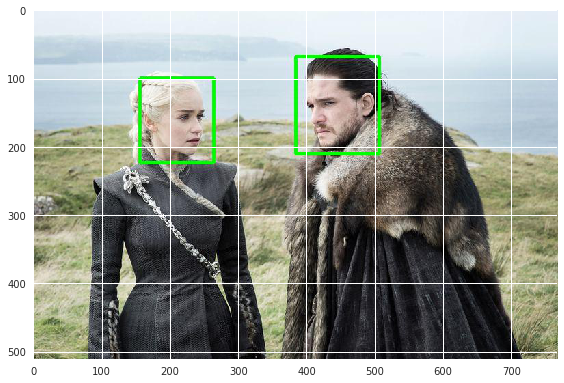

In [21]:
face_img = io.imread('face_detection_output.jpeg')
io.imshow(face_img)

# Bonus Lab
<br>
Look at ./utils/detect.py file. It has all features of vision API read to invoke. Feel free to try things like landmark, logos, safe_search, etc. See landmark example below to get going. If you feel adventurous, you can even take on a [Kaggle Challenge](https://www.kaggle.com/c/landmark-recognition-challenge#)

In [22]:
from utils import detect

In [27]:
detect.detect_landmarks_uri('https://lh3.googleusercontent.com/-qsiWGuoACYw/TKDGd3lfDQI/AAAAAAAATg0/RghgKG0aekE/s1600/')

Landmarks:
Tokyo DisneySea
